In [ ]:
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

# classification
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# plotting
import seaborn as sns
import scipy.stats as stats
from scipy.stats import mannwhitneyu

In [ ]:
import os
folder_path = #'/content/drive/MyDrive/Research/Uma_Research_Project/Spring 2025/PAPER: Advancing Dendritic Spine Morphometry Analysis: Clustering for Understanding Shape Distributions and Synaptic Plasticity/'

files = os.listdir(folder_path)
print(files)

import pandas as pd

df1_path = #'/content/drive/MyDrive/Research/Uma_Research_Project/Spring 2025/PAPER: Advancing Dendritic Spine Morphometry Analysis: Clustering for Understanding Shape Distributions and Synaptic Plasticity/spineJ_features_df.csv'
df2_path = #'/content/drive/MyDrive/Research/Uma_Research_Project/Spring 2025/PAPER: Advancing Dendritic Spine Morphometry Analysis: Clustering for Understanding Shape Distributions and Synaptic Plasticity/dendritic_spine_morphology_full.csv'

# merge shape features (spineJ) and intensity contour features (python)
df1 = pd.read_csv(df1_path)
df2 = pd.read_csv(df2_path)
spine_features = pd.merge(df1, df2, on="Spine Name", how="inner")

output_path = #'/content/drive/MyDrive/Research/Uma_Research_Project/Spring 2025/PAPER: Advancing Dendritic Spine Morphometry Analysis: Clustering for Understanding Shape Distributions and Synaptic Plasticity/merged_spine_data.csv'
spine_features.to_csv(output_path, index=False)
spine_features.to_csv('merged_spine_data.csv', index=False)

print(spine_features.shape)
print(spine_features.head())

# compute derived features
spine_features['WLR'] = spine_features['Average neckwidth (nm)'] / spine_features['Length spine (nm)']
spine_features['LWR'] = spine_features['Length spine (nm)'] / spine_features['Average neckwidth (nm)']
spine_features['LAR'] = spine_features['Length spine (nm)'] / spine_features['Area Head (nm²)']
label_index = spine_features.columns.get_loc('Std_Fit_Goodness')

for col_name in ['WLR', 'LWR', 'LAR'][::-1]:
    col = spine_features.pop(col_name)
    spine_features.insert(label_index, col_name, col)

print(spine_features.columns.tolist())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Dataset_Labels.xlsx', 'Dataset Intensity 2', 'Dataset Binary', 'Code', 'dendritic_spine_morphology_full.csv', 'Figures', 'Methods Paper Outline.gdoc', 'Sections Outline.gsheet', 'Draft.gdoc', 'Data_SpineJ', 'spineJ_features_df.csv', 'Structural Outline.gdoc', 'merged_spine_data.csv', 'merged_spine_data_feature_ver.csv', 'Paper feedback notes.gdoc', 'Supporting Information - Dendritic Spine Clustering .gdoc', 'feature_boxplots_grid_trimmed.png']
(447, 35)
   Spine Name  Length neck (nm)  Length spine (nm)  Ratio (%)  \
0           1           155.671           1035.950     15.027   
1           2           266.428            786.271     33.885   
2           3           804.383           1521.639     52.863   
3           4           502.941           1538.844     32.683   
4           5           301.784           1080.420     27.932   

   Minor axis (nm) 

In [ ]:
data= spine_features

In [ ]:
# drop nans
num_nan_rows = data.isna().any(axis=1).sum()
print(f"Number of rows with NaN values: {num_nan_rows}")
data = data.dropna()

data = data.drop(columns=['Aspect_Ratio'])

Number of rows with NaN values: 1


In [ ]:
feature_columns = data.columns[1:-1]  # remove spine number and label

summary_stats = data.groupby("Spine Label")[feature_columns].agg(['mean', 'std'])

# compute p value between spine types for each spine
spine_types = data["Spine Label"].unique()
p_values = pd.DataFrame(index=feature_columns, columns=[f"{a} vs {b}" for i, a in enumerate(spine_types) for b in spine_types[i+1:]])

for feature in feature_columns:
    for i, a in enumerate(spine_types):
        for b in spine_types[i+1:]:
            #_, p = stats.ttest_ind(data[data["Spine Label"] == a][feature], data[data["Spine Label"] == b][feature], equal_var=True)
            _, p = mannwhitneyu(data[data["Spine Label"] == a][feature], data[data["Spine Label"] == b][feature])

            p_values.at[feature, f"{a} vs {b}"] = p
print("\nP-Values for Spine Feature Comparisons:\n", p_values)

# if p<0.05, there is a statistically significant difference between the groups (keep as a feature)
# if p>>0.05 there is no statistically significant difference between the two groups. If this is true for 2 or more comparisons drop feature


P-Values for Spine Feature Comparisons:
                         Mushroom vs Stubby Mushroom vs Thin Stubby vs Thin
Length neck (nm)                       0.0              0.0            0.0
Length spine (nm)                      0.0              0.0            0.0
Ratio (%)                              0.0              0.0            0.0
Minor axis (nm)                        0.0         0.034253            0.0
Major axis (nm)                        0.0         0.205074            0.0
Aspect Ratio                      0.000001         0.087631       0.000003
Perimeter Head (nm)                    0.0         0.071373            0.0
Area Head (nm²)                        0.0          0.08933            0.0
Smallest neckwidth (nm)                0.0         0.353621            0.0
Median neckwidth (nm)                  0.0          0.04656       0.000006
Average neckwidth (nm)                 0.0         0.066089       0.000001
Mean_Fit_Goodness                 0.000399          0.0000

/tmp/ipython-input-20-3477608077.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-20-3477608077.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-20-3477608077.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-20-3477608077.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-20-3477608077.py:24: FutureWa

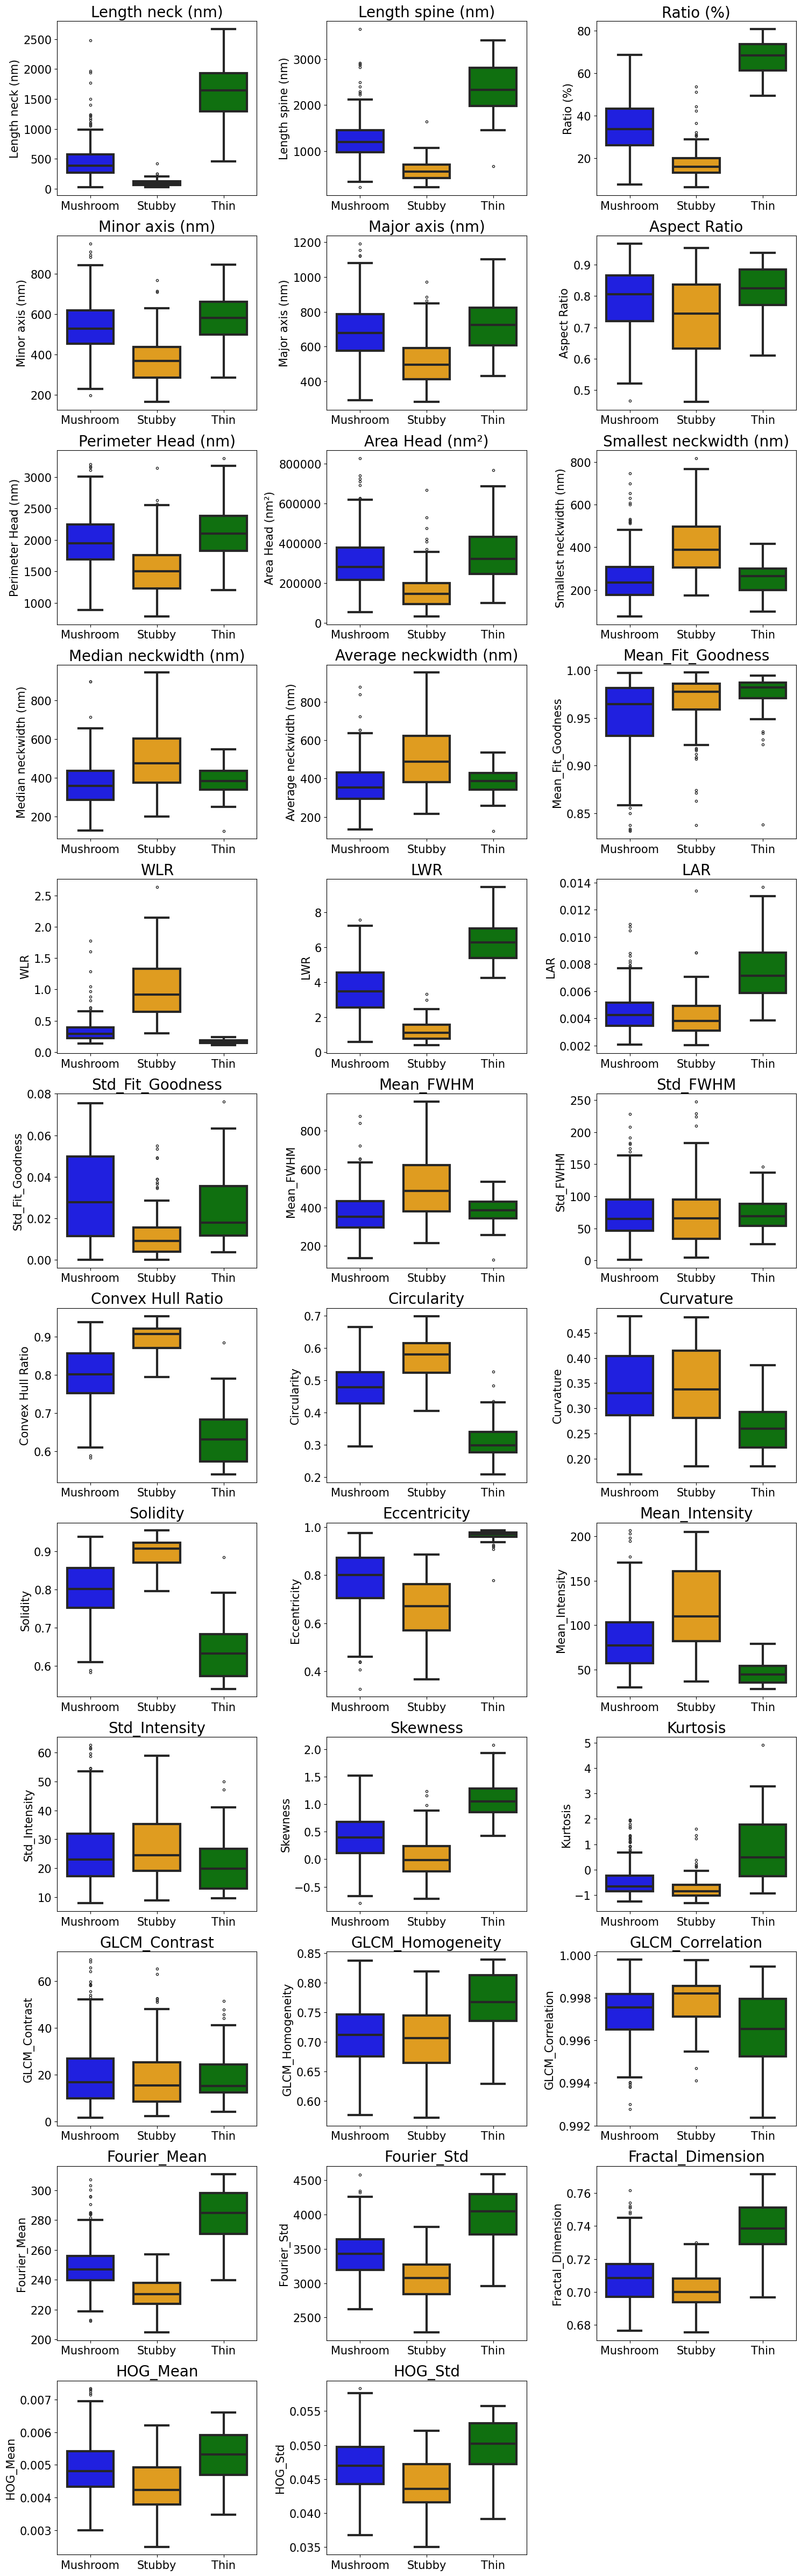

In [ ]:
import seaborn as sns

# Set up output path
output_path_box = os.path.join(folder_path, "feature_boxplots_grid_trimmed.png")

# Grid dimensions
cols = 3
rows = int(np.ceil(len(feature_columns) / cols))

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

colors = {'Thin': 'green', 'Mushroom': 'blue', 'Stubby': 'orange'}

for i, feature in enumerate(feature_columns):
    ax = axes[i]

    # Remove top and bottom 0.5% outliers for the feature
    lower_bound = data[feature].quantile(0.005)
    upper_bound = data[feature].quantile(0.995)
    filtered_data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

    # Plot boxplot
    sns.boxplot(
        data=filtered_data, x="Spine Label", y=feature, ax=ax,
        palette=colors, width=0.7, linewidth=3, fliersize=3
    )

    ax.set_title(f"{feature}", fontsize=20)
    ax.set_xlabel("")
    ax.set_ylabel(feature, fontsize=15)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

# Remove unused axes
for k in range(len(feature_columns), len(axes)):
    fig.delaxes(axes[k])

fig.tight_layout()
fig.savefig(output_path_box, dpi=300)


In [ ]:
# feature scaling
features = data.select_dtypes(include=[np.number]).drop(columns=['Spine Name', 'Std_FWHM' , 'GLCM_Contrast'])
scaler = StandardScaler()
scaled_features_df = scaler.fit_transform(features)

features

,Length neck (nm),Length spine (nm),Ratio (%),Minor axis (nm),Major axis (nm),Aspect Ratio,Perimeter Head (nm),Area Head (nm²),Smallest neckwidth (nm),Median neckwidth (nm),...,Std_Intensity,Skewness,Kurtosis,GLCM_Homogeneity,GLCM_Correlation,Fourier_Mean,Fourier_Std,Fractal_Dimension,HOG_Mean,HOG_Std
0,155.671,1035.950,15.027,649.809,771.614,0.842,2302.584,392224.246,225.421,429.936,...,36.210788,0.609083,-0.440571,0.729399,0.998206,264.223421,4030.331281,0.688551,0.006868,0.055129
1,266.428,786.271,33.885,383.985,463.591,0.828,1343.210,139652.432,55.274,197.841,...,16.929981,0.153603,-0.808765,0.748898,0.998415,272.479783,4205.778824,0.707619,0.006689,0.054021
2,804.383,1521.639,52.863,630.515,659.359,0.956,2090.376,324819.294,124.132,436.902,...,45.805772,0.669703,-0.289587,0.707914,0.996004,272.560392,3826.847930,0.690038,0.005868,0.052963
3,502.941,1538.844,32.683,625.919,812.405,0.770,2292.985,399269.281,132.199,263.180,...,51.088974,1.017339,-0.078457,0.772766,0.996735,272.271437,4042.031793,0.710049,0.007496,0.056976
4,301.784,1080.420,27.932,437.596,685.737,0.638,1799.003,234488.731,148.835,244.715,...,13.035301,1.070204,1.243501,0.775988,0.997145,250.335798,3678.828650,0.725769,0.005708,0.049673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,507.322,1333.007,38.058,512.938,641.388,0.800,1841.861,257487.521,323.137,336.697,...,21.395750,0.399295,-0.883830,0.639730,0.996432,300.095481,4579.410219,0.697741,0.006429,0.058442
443,761.637,1578.096,48.263,646.719,668.925,0.967,2101.598,337894.073,261.347,325.407,...,42.290214,0.641436,-0.818279,0.670098,0.993814,284.597696,4200.518766,0.690435,0.007152,0.057020
444,343.693,1233.606,27.861,529.153,968.385,0.546,2523.270,402040.008,224.871,288.626,...,34.742459,0.299981,-0.812131,0.667002,0.996149,258.144871,3850.318360,0.676398,0.006647,0.056538
445,399.954,1519.891,26.315,666.383,716.613,0.930,2272.152,376337.686,162.242,230.407,...,38.102196,0.525316,-0.846262,0.738908,0.996545,263.858684,3863.861585,0.678764,0.006520,0.055451


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        59
           1       0.95      0.96      0.95        54
           2       0.92      1.00      0.96        59

    accuracy                           0.94       172
   macro avg       0.94      0.94      0.94       172
weighted avg       0.94      0.94      0.94       172

[[51  3  5]
 [ 2 52  0]
 [ 0  0 59]]


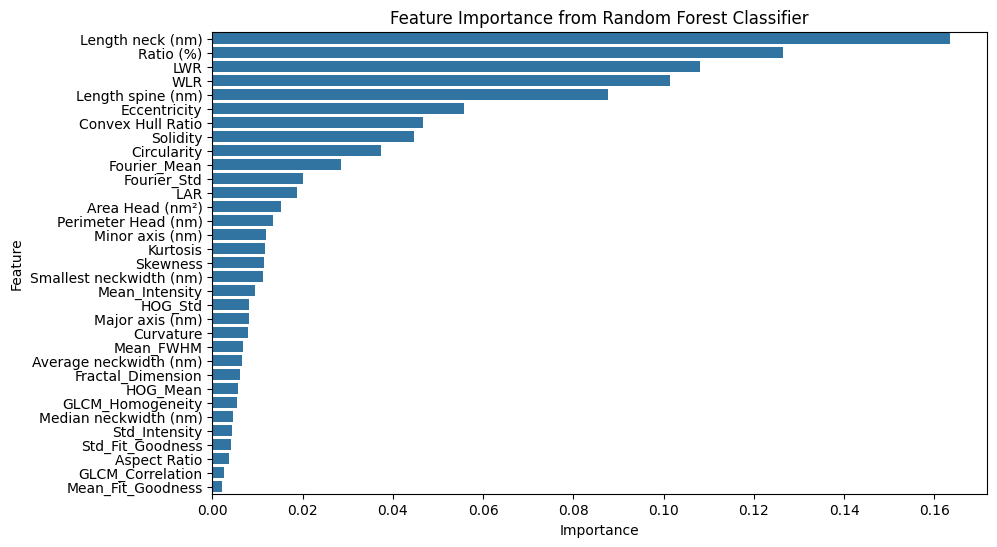

Mean cross-validation score: 0.9627566979464165


In [ ]:
# ground truth classification and feature importance
features = data.select_dtypes(include=[np.number]).drop(columns=['Spine Name', 'Std_FWHM' ,'GLCM_Contrast'])
labels = data['Spine Label']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# encode labels
labels_encoded = labels.astype('category').cat.codes

smote = SMOTE(random_state=42)# class imbalance
features_resampled, labels_resampled = smote.fit_resample(scaled_data, labels_encoded)

X_train, X_test, y_train, y_test = train_test_split(features_resampled, labels_resampled, test_size=0.2, random_state=2312)

classifier = RandomForestClassifier(random_state=42)

# gridsearch for best params
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

classifier.fit(X_train, y_train)

# evaluate
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# feature importance
feature_importances = classifier.feature_importances_
importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance from Random Forest Classifier')
plt.show()

# cv
cv_scores = cross_val_score(classifier, features_resampled, labels_resampled, cv=5)
print("Mean cross-validation score:", np.mean(cv_scores))

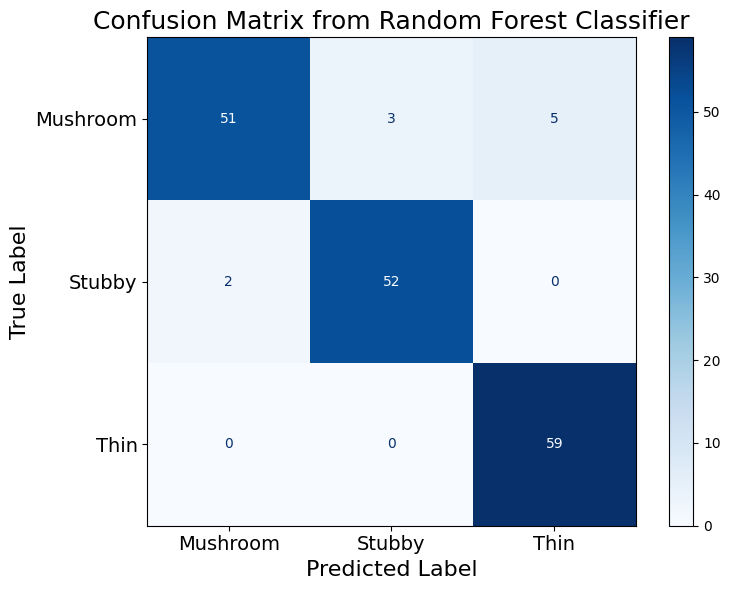

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix and display labels
cm = confusion_matrix(y_test, y_pred)
label_names = labels.astype('category').cat.categories

# Create display object and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')

ax.set_title('Confusion Matrix from Random Forest Classifier', fontsize=18)
ax.set_xlabel('Predicted Label', fontsize=16)
ax.set_ylabel('True Label', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()


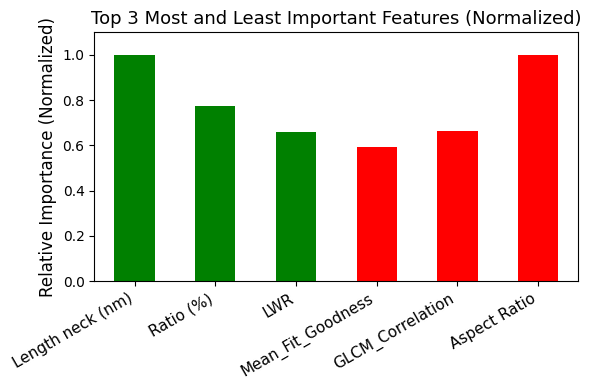

In [ ]:
# Assume rf is your trained RandomForestClassifier
# and X is your feature matrix used for training

# Get feature importances
importances = pd.Series(classifier.feature_importances_, index=features.columns)

# Select top 3 most and least important
most_important = importances.sort_values(ascending=False).head(3)
least_important = importances.sort_values(ascending=True).head(3)

# Combine for plotting
combined = pd.concat([most_important, least_important])
colors = ['green'] * 3 + ['red'] * 3  # Green for most important, red for least


norm_most = most_important / most_important.max()
norm_least = least_important / least_important.max()
norm_combined = pd.concat([norm_most, norm_least])
colors = ['green'] * 3 + ['red'] * 3

plt.figure(figsize=(6, 4))
norm_combined.plot(kind='bar', color=colors)
plt.ylabel("Relative Importance (Normalized)", fontsize=12)
plt.title("Top 3 Most and Least Important Features (Normalized)", fontsize=13)
plt.xticks(rotation=30, ha='right', fontsize=11)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

In [ ]:
# feature scaling
spine_features_updated = spine_features.drop(columns=['Std_FWHM' , 'GLCM_Contrast', 'GLCM_Correlation', 'GLCM_Homogeneity', 'Mean_Fit_Goodness'])
spine_features_updated

,Spine Name,Length neck (nm),Length spine (nm),Ratio (%),Minor axis (nm),Major axis (nm),Aspect Ratio,Perimeter Head (nm),Area Head (nm²),Smallest neckwidth (nm),...,Mean_Intensity,Std_Intensity,Skewness,Kurtosis,Fourier_Mean,Fourier_Std,Fractal_Dimension,HOG_Mean,HOG_Std,Spine Label
0,1,155.671,1035.950,15.027,649.809,771.614,0.842,2302.584,392224.246,225.421,...,91.809274,36.210788,0.609083,-0.440571,264.223421,4030.331281,0.688551,0.006868,0.055129,Mushroom
1,2,266.428,786.271,33.885,383.985,463.591,0.828,1343.210,139652.432,55.274,...,44.620322,16.929981,0.153603,-0.808765,272.479783,4205.778824,0.707619,0.006689,0.054021,Mushroom
2,3,804.383,1521.639,52.863,630.515,659.359,0.956,2090.376,324819.294,124.132,...,100.201567,45.805772,0.669703,-0.289587,272.560392,3826.847930,0.690038,0.005868,0.052963,Mushroom
3,4,502.941,1538.844,32.683,625.919,812.405,0.770,2292.985,399269.281,132.199,...,87.017174,51.088974,1.017339,-0.078457,272.271437,4042.031793,0.710049,0.007496,0.056976,Mushroom
4,5,301.784,1080.420,27.932,437.596,685.737,0.638,1799.003,234488.731,148.835,...,36.369801,13.035301,1.070204,1.243501,250.335798,3678.828650,0.725769,0.005708,0.049673,Mushroom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,452,507.322,1333.007,38.058,512.938,641.388,0.800,1841.861,257487.521,323.137,...,82.764857,21.395750,0.399295,-0.883830,300.095481,4579.410219,0.697741,0.006429,0.058442,Mushroom
443,453,761.637,1578.096,48.263,646.719,668.925,0.967,2101.598,337894.073,261.347,...,102.189498,42.290214,0.641436,-0.818279,284.597696,4200.518766,0.690435,0.007152,0.057020,Mushroom
444,454,343.693,1233.606,27.861,529.153,968.385,0.546,2523.270,402040.008,224.871,...,129.539814,34.742459,0.299981,-0.812131,258.144871,3850.318360,0.676398,0.006647,0.056538,Mushroom
445,455,399.954,1519.891,26.315,666.383,716.613,0.930,2272.152,376337.686,162.242,...,106.075902,38.102196,0.525316,-0.846262,263.858684,3863.861585,0.678764,0.006520,0.055451,Mushroom
